In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1.a - Rotina para gerar pacote de ondas gaussianas

In [36]:
def pacote_onda(x,y,k_0,x_0,y_0,sig):
    term_1 = k_0*(x+y)*1j
    term_2 = ((x-x_0)**2 + (y-y_0)**2)
    return abs(np.exp((term_1-term_2)/(2*sig**2)))

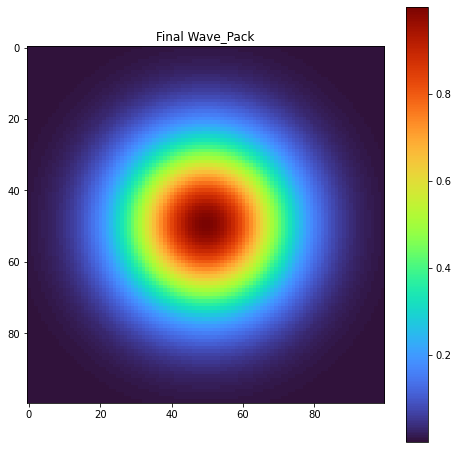

In [37]:
x = np.linspace(0,5,100)
y = np.linspace(0,5,100)
X,Y = np.meshgrid(x,y)
final = pacote_onda(X,Y,0.2,2.5,2.5,0.8)



#final = np.zeros((100,100))
#for i in range(100):
#    for j in range(100):
#        final[i,j] = abs(pacote_onda(X[i][j],Y[i][0],1,2.5,2.5,2))


plt.figure(figsize=(8,8))
plt.title('Final Wave_Pack')
plt.imshow(final,cmap='turbo')
plt.colorbar()
plt.show()